# Introduction

In this project for my MLDM classification assessment, the dataset was curated by Barry Becker from the 1994 US Census Database about incomes of adults. The report attached to this project includes links, references, and the raw dataset for further exploration and verification.

The main objective of this project is to forecast whether or not an individual's annual income exceeds $50,000. The project aims to explore the correlations between demographic variables such as age, education level, gender, occupation, and financial indicators like capital gain and loss in predicting income levels. Further details on the demographics and indicators for understanding the dataset is including in a readme.txt file within this project.

This project will concentrate on employing two classification methods, namely K-Nearest Neighbors(KNN) and Random Forest to accomplish this objective.

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as ask
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#load dataset
dataset = pd.read_csv('adult.csv')

In [3]:
dataset.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


In [4]:
dataset.shape

(48842, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Pre-Processing

### Cleaning Data

While scrutinizing the dataset, it was observed that missing data were represented by the symbol "?". In lay terms, this signifies an information that is not provided. However, Python scripts does not recognize "?" as a placeholder for missing values. 

To address this, it is crucial to convert "?" to a value that the programming language interprets as a missing value. Consequently, the decision is to replace "?" with "NaN" to facilitate proper handling and recognition of missing values in the dataset.

In [6]:
# Replacing the "?" with "Nan"
dataset.replace('?', np.nan, inplace=True)

In [7]:
# Finding out colunmns with missing values
cols_with_missing_values = dataset.columns[dataset.isnull().any()].tolist()
missing_values_count = dataset[cols_with_missing_values].isnull().sum()
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
workclass         2799
occupation        2809
native-country     857
dtype: int64


In [8]:
# Replacing mising values in the 'workclass' with the mode
dataset['workclass'].fillna(dataset['workclass'].mode()[0], inplace=True)

# Replacing mising values in the 'occupation' with the mode
dataset['occupation'].fillna(dataset['occupation'].mode()[0], inplace=True)

# Replacing mising values in the 'native-country' with the mode
dataset['native-country'].fillna(dataset['native-country'].mode()[0], inplace=True)

### Simplifying the variables in each catergorical Values

Within the dataset, there are values across columns that are either synonymous or represent conjugates of each other. A recommended practice is to group such values together under a common identifier and assign a Unified name to them. This simplification process contributes to streamlining our dataset for clearer representation and analysis.

#### Calling the Unique Values in each column Calling the Unique Values in each column

In [9]:
unique_values_workclass = dataset['workclass'].unique()
print('Values in workclass:') 
print(unique_values_workclass)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_education = dataset['education'].unique()
print('Values in education:') 
print(unique_values_education)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_marital_status = dataset['marital-status'].unique()
print('Values in marital-status:') 
print(unique_values_marital_status)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_occupation = dataset['occupation'].unique()
print('Values in occupation:') 
print(unique_values_occupation)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_relationship = dataset['relationship'].unique()
print('Values in relationship:') 
print(unique_values_relationship)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_race = dataset['race'].unique()
print('Values in race:') 
print(unique_values_race)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_gender = dataset['gender'].unique()
print('Values in gender:') 
print(unique_values_gender)
print('-----------------------------------------------')
print('-----------------------------------------------')
unique_values_native_country = dataset['native-country'].unique()
print('Values in native-country:') 
print(unique_values_native_country)

Values in workclass:
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
-----------------------------------------------
-----------------------------------------------
Values in education:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
-----------------------------------------------
-----------------------------------------------
Values in marital-status:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
-----------------------------------------------
-----------------------------------------------
Values in occupation:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners'

#### Trauncating the categorical values in some columns

In [10]:
self_employed = ['Self-emp-not-inc', 'Self-emp-inc']
unemployed = ['Without-pay', 'Never-worked']
govt_employed = ['Local-gov', 'Federal-gov', 'State-gov']

dataset['workclass'].replace(to_replace = self_employed, value = 'self_employed', inplace = True)
dataset['workclass'].replace(to_replace = unemployed, value = 'unemployed', inplace = True)
dataset['workclass'].replace(to_replace = govt_employed, value = 'govt_employed', inplace = True)
dataset['workclass'].value_counts()

workclass
Private          36705
govt_employed     6549
self_employed     5557
unemployed          31
Name: count, dtype: int64

In [11]:
married = ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
single = ['Never-married']

dataset['marital-status'].replace(to_replace = married, value = 'married', inplace = True)
dataset['marital-status'].replace(to_replace = single, value = 'single', inplace = True)
dataset['marital-status'].value_counts()

marital-status
married      23044
single       16117
Divorced      6633
Separated     1530
Widowed       1518
Name: count, dtype: int64

In [12]:
basic_edu = ['11th', '7th-8th', '5th-6th', '9th', '10th', '12th', '1st-4th']
college_edu = ['Assoc-acdm', 'Some-college', 'Assoc-voc']
graduates = ['Bachelors', 'Masters']
higher_edu = ['Doctorate', 'Prof-school']

dataset['education'].replace(to_replace = basic_edu, value = 'basic_edu', inplace = True)
dataset['education'].replace(to_replace = college_edu, value = 'college_edu', inplace = True)
dataset['education'].replace(to_replace = graduates, value = 'graduates', inplace = True)
dataset['education'].replace(to_replace = higher_edu, value = 'higher_edu', inplace = True)
dataset['education'].value_counts()

education
HS-grad        15784
college_edu    14540
graduates      10682
basic_edu       6325
higher_edu      1428
Preschool         83
Name: count, dtype: int64

### Droping Irrelevant Columns

Upon close examining the dataset, it is evident that the "education-num" column corresponds to the numeric representation of individuals "education". Additionally, there appears to be an association between the "relationship" column and their "marital-status."  Hence, we will be dropping both columns from our dataset as they wont be advantageous to our objective .

In [13]:
dataset.drop(columns=['educational-num', 'relationship'], inplace=True)

In [14]:
dataset.head(8)

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,basic_edu,single,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,married,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,govt_employed,336951,college_edu,married,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,college_edu,married,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,college_edu,single,Prof-specialty,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,basic_edu,single,Other-service,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,single,Prof-specialty,Black,Male,0,0,40,United-States,<=50K
7,63,self_employed,104626,higher_edu,married,Prof-specialty,White,Male,3103,0,32,United-States,>50K


its is safe to belive that our dataset is now clean and ready to be used, the data could still undergo further cleaning if further observations are made after the EDA is carried out

# Exploratory data analysis

In [15]:
dataset.income.value_counts(normalize=True)*100

income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64

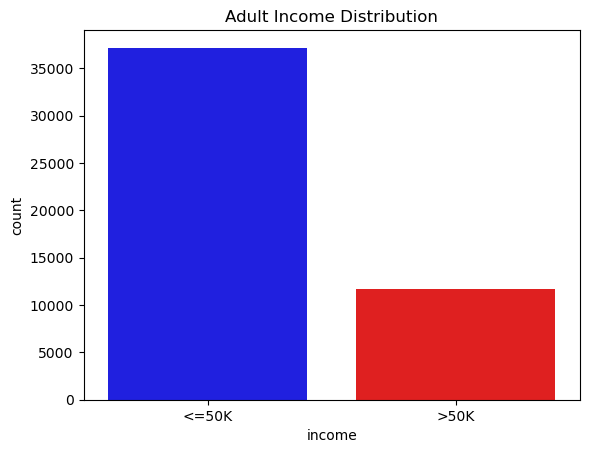

In [16]:
sns.countplot(data=dataset, x='income', palette=['blue', 'red'])
plt.title('Adult Income Distribution')
plt.show()

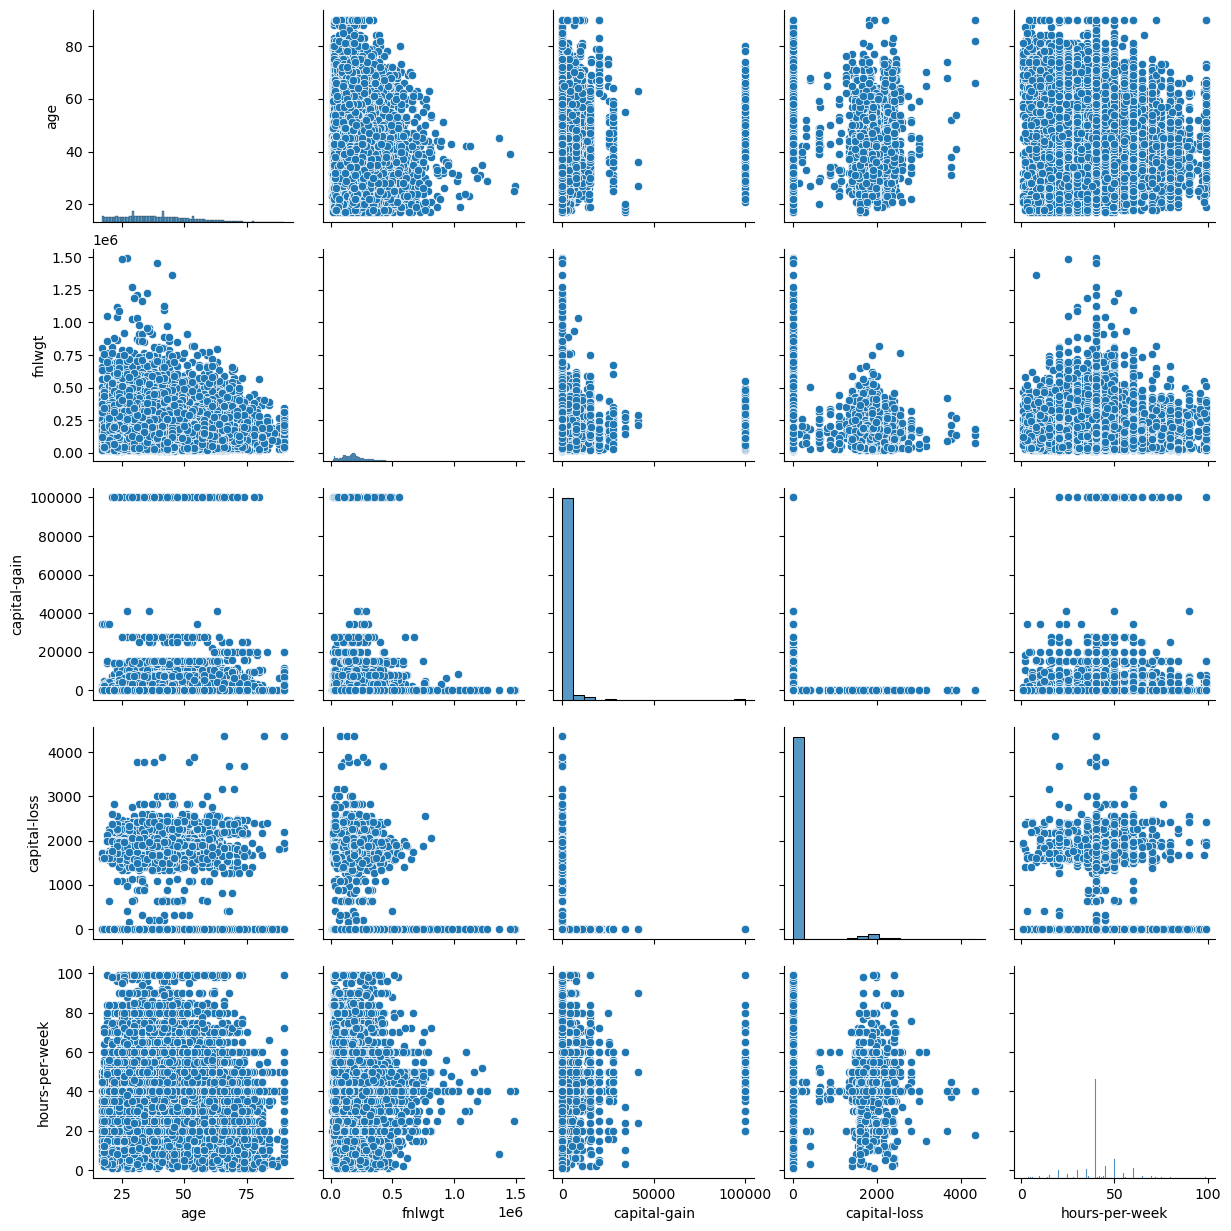

In [17]:
sns.pairplot(dataset, palette='blue')
plt.show()

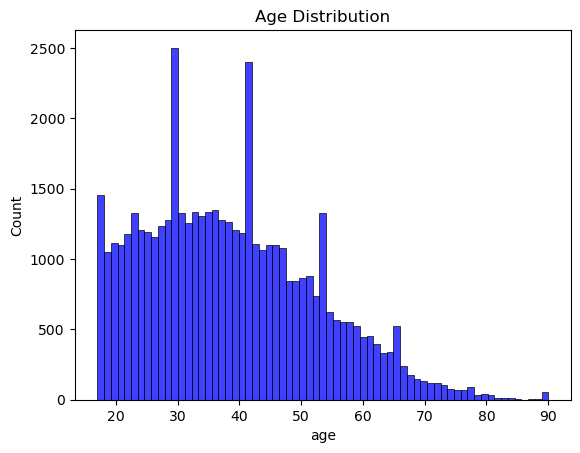

In [18]:
# Observing the income distribution based on individual age
sns.histplot(dataset.age, color='blue')
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

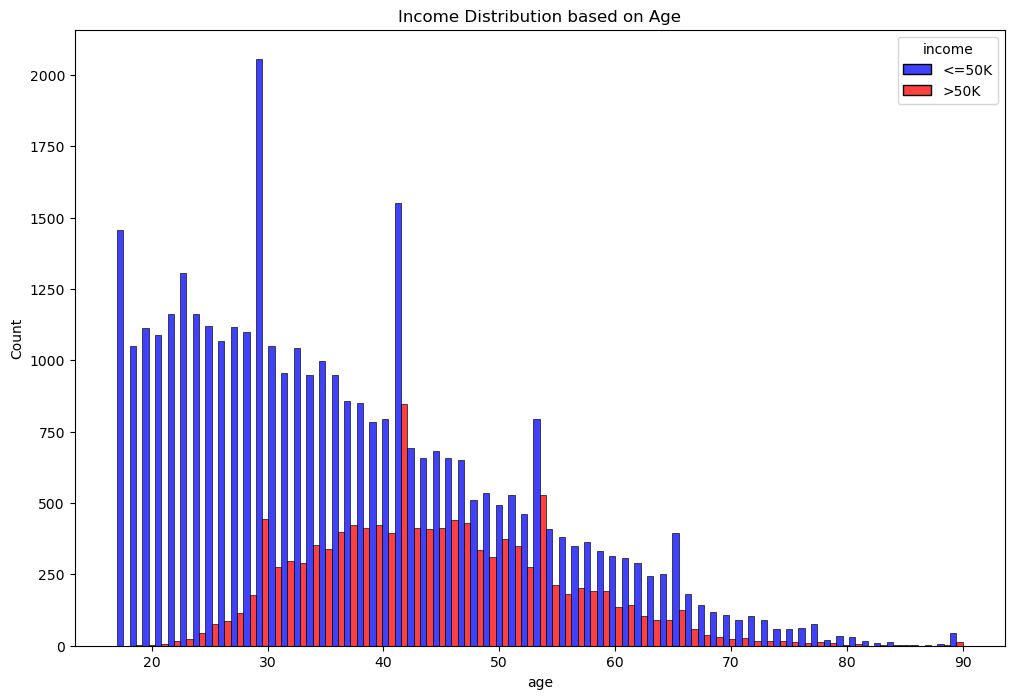

In [19]:
plt.figure(figsize=(12,8))
plt.title('Income Distribution based on Age')
sns.histplot(x='age', hue='income', data=dataset, multiple='dodge', palette=['blue', 'red'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

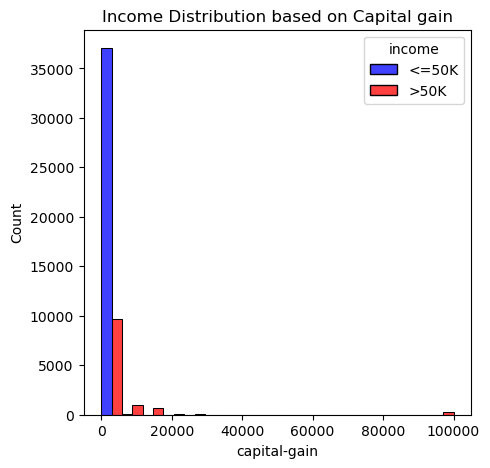

In [20]:
plt.figure(figsize=(5,5))
plt.title('Income Distribution based on Capital gain')
sns.histplot(x='capital-gain', hue='income', data=dataset, multiple='dodge', palette=['blue', 'red'])
plt.show

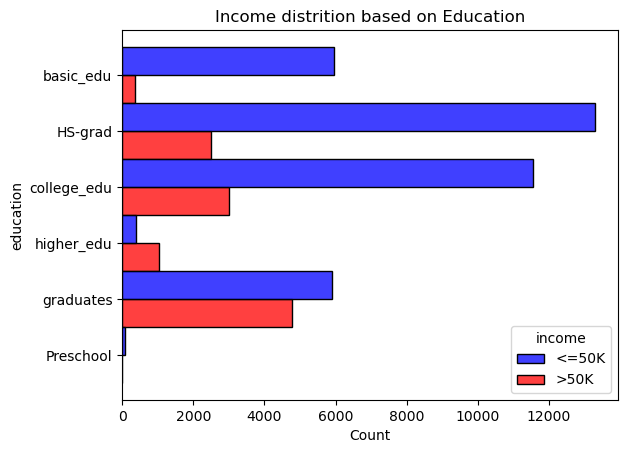

In [21]:
# Observing the income distribution based on individual education level
sns.histplot(data=dataset, hue='income', y='education', multiple='dodge', palette=['blue', 'red'])
plt.title('Income distrition based on Education')
plt.show()

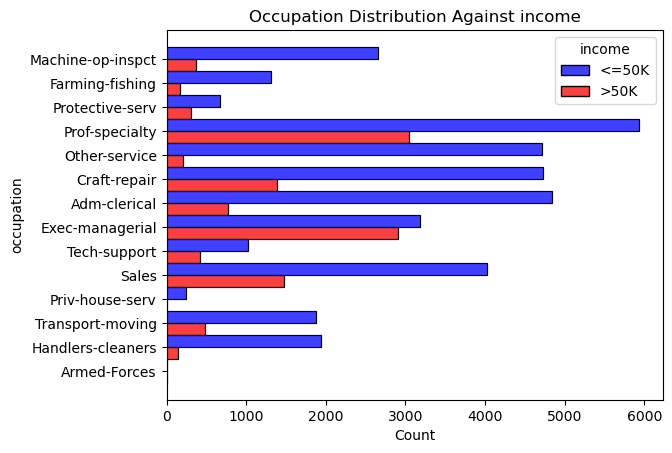

In [22]:
sns.histplot(data=dataset, y='occupation', hue='income', palette=['blue', 'red'], multiple='dodge')
plt.title('Occupation Distribution Against income')
plt.show()

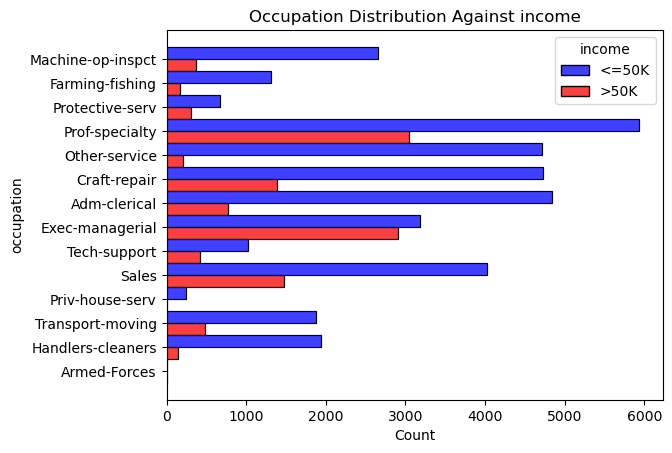

In [23]:
sns.histplot(data=dataset, y='occupation', hue='income', palette=['blue', 'red'], multiple='dodge')
plt.title('Occupation Distribution Against income')
plt.show()

In [24]:
# Assigning numerical values to the categorical columns
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender', 'native-country', 'income']

le = LabelEncoder()

# Iterating over each categorical column
for column in columns_to_encode:
    dataset[column] = le.fit_transform(dataset[column])

In [25]:
dataset.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,2,4,6,2,1,0,0,40,38,0
1,38,0,89814,0,3,4,4,1,0,0,50,38,0
2,28,1,336951,3,3,10,4,1,0,0,40,38,1
3,44,0,160323,3,3,6,2,1,7688,0,40,38,1
4,18,0,103497,3,4,9,4,0,0,0,30,38,0


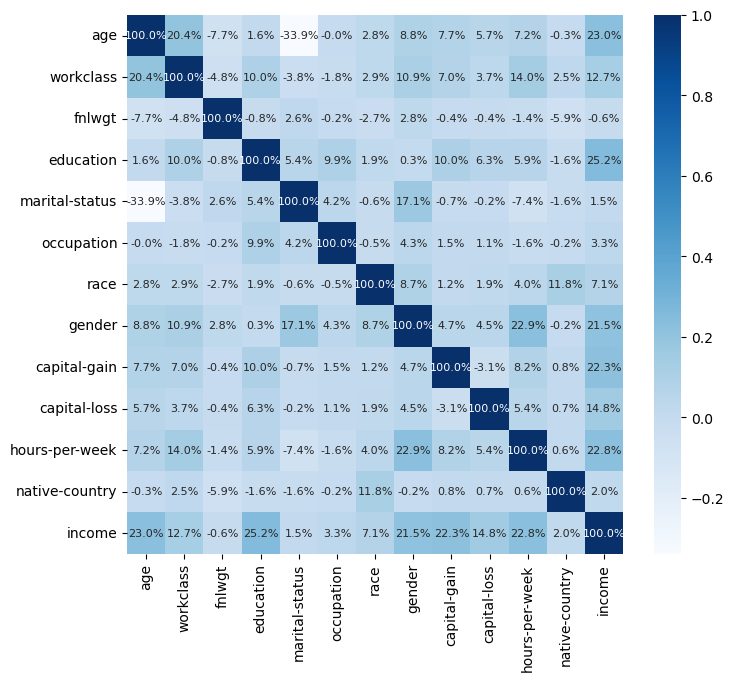

In [26]:
plt.figure(figsize=(8,7))
correlation_matrix = dataset.corr()
annot_font_size = 8
# Create a heatmap with reduced font size
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".1%", annot_kws={"size": annot_font_size})
plt.show()

# Classification

In [27]:
# Importing libraries set 2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
### Fitting and Transforming the Dataset

In [29]:
X = dataset.drop('income', axis=1)  # Features
y = dataset['income']  # Target variable

In [30]:
# Splitting the dataset into the Training set and the Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

<Axes: xlabel='income', ylabel='count'>

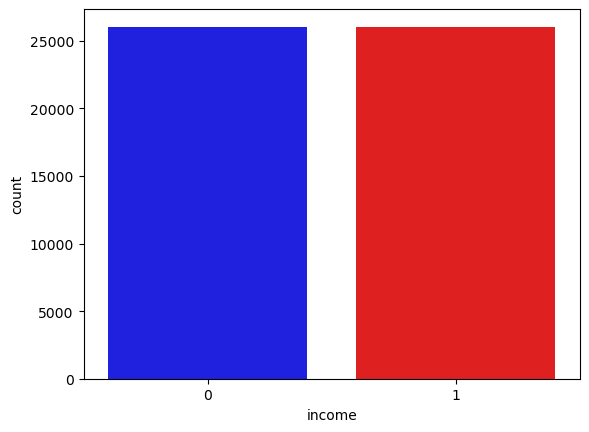

In [31]:
from imblearn.over_sampling import RandomOverSampler

resampler = SMOTE(random_state=0)
X_train, y_train = resampler.fit_resample(X_train,y_train)
sns.countplot(x= y_train, palette=['blue', 'red'])

In [32]:
#scaling the data set
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## Using KNN 

#### Training the model

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_sc, y_train)

KNeighborsClassifier()

#### Evaluating the model

In [34]:
# Predicting the test set results
y_pred = classifier.predict(X_test_sc)
print(y_pred.tolist())

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 

In [35]:
print(y_test.tolist())

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 

In [36]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('confusion Matrix:')
print(cm, '\n\n')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy: 0.75


confusion Matrix:
[[8294 2818]
 [ 772 2769]] 


-----------------------------------------------------------
-----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     11112
           1       0.50      0.78      0.61      3541

    accuracy                           0.75     14653
   macro avg       0.71      0.76      0.71     14653
weighted avg       0.81      0.75      0.77     14653



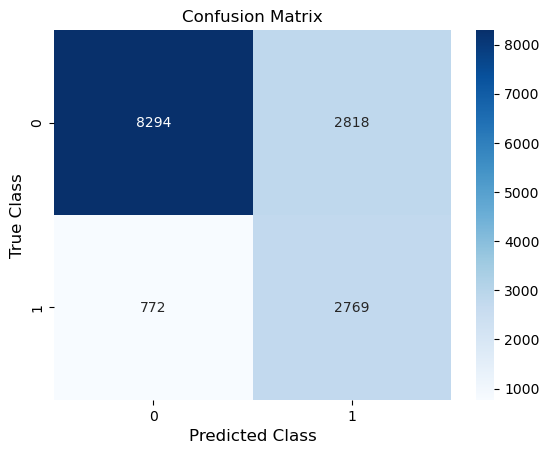

In [37]:
ax = sns.heatmap(cm, cmap ='Blues', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

#### Identifying the most important features while this model.

In [38]:
knn = KNeighborsClassifier()

# Fit the KNN model
knn.fit(X_train, y_train)

# Calculate permutation importances
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Permutation Feature Importances:")
print(feature_importance_df)

Permutation Feature Importances:
           feature  importance
8     capital-gain    0.042885
2           fnlwgt    0.022678
9     capital-loss    0.013083
0              age    0.011772
10  hours-per-week    0.006825
5       occupation    0.000758
3        education    0.000232
6             race    0.000150
4   marital-status   -0.000014
1        workclass   -0.000027
7           gender   -0.000102
11  native-country   -0.000512


### Using Random Forest

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
print(y_pred.tolist())

[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 

In [42]:
print(y_test.tolist())

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 

In [43]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('confusion Matrix:')
print(cm, '\n\n')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy: 0.83


confusion Matrix:
[[9557 1555]
 [ 990 2551]] 


-----------------------------------------------------------
-----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11112
           1       0.62      0.72      0.67      3541

    accuracy                           0.83     14653
   macro avg       0.76      0.79      0.77     14653
weighted avg       0.84      0.83      0.83     14653



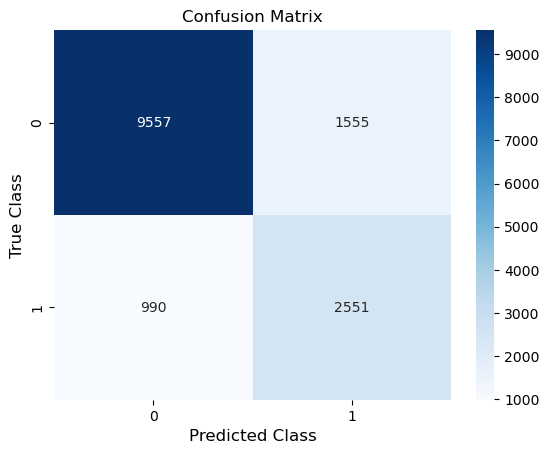

In [44]:
ax = sns.heatmap(cm, cmap ='Blues', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

#### Identifying the most important features while this model.

In [45]:
rf = RandomForestClassifier()

# Fit the RF model
rf.fit(X_train, y_train)

# Calculate permutation importances
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Permutation Feature Importances:")
print(feature_importance_df)

Permutation Feature Importances:
           feature  importance
4   marital-status    0.070306
8     capital-gain    0.043090
3        education    0.024452
0              age    0.016870
5       occupation    0.016454
10  hours-per-week    0.011417
9     capital-loss    0.009172
7           gender    0.008353
1        workclass    0.008087
11  native-country    0.002989
2           fnlwgt    0.002341
6             race    0.002320


# Conclusion

To conclude, the results of our machine learning project indicate that the Random Forest algorithm outperforms K-Nearest Neighbors(KNN) in predicting income levels based on demographic variables and financial indicators. The Random Forest model exhibited superior accuracy and predictive performance, showcasing its effectiveness in handling the perplexity of the dataset. 

#### for KNN 
Key take notes:
    accuracy: #0.87 
    best features (Top 5): capital-gain, fnlwgt, capital-loss, age and hours-per-week
    
#### for Randomforest
Key take notes:
    accuracy: #0.83 
    best features (Top 5): marital-status, capital-gain, education, age and capital-loss